In [ ]:
# default_exp no_export

In [ ]:
%matplotlib inline
from pylab import *
from sie.mcmc import StatsModel

In [ ]:
x=array([ .2, 0.39595125,   0.22981019,  -4.38971186,   4.57653843,
         4.38800312,  -3.14227423,  -1.66494169,  -4.0148864 ,
         4.10562856,   2.19091249,  11.18389772,   1.53046862,
        -6.05251134,  -1.5028012 ,   1.12985659,   0.84215301,
        -4.37528332,  -1.51364766,  -6.06991254,  -1.11838459,
         3.94521945,   3.65019148,  -0.5446649 ,   0.85721735,
         1.41391355,   1.43089269,   0.6089257 ,   5.03635336,
         4.92170115,   4.2066542 ,   2.48580373,   9.2895543 ,
         2.92144036,   2.91079341,   0.55777809,   8.04122751,
       -12.06833542,  -0.70706651,  14.96419495,   0.82773164,
         6.32229804,   6.71565991,   5.57064652,   4.87913438,
        -0.39353282,  -4.45373509,  -3.54839884,   5.38362984,
         4.70926759,   3.65790252,   0.63145437,   5.24971408,
         8.2553935 ,   4.79006995,  -8.33670551,  -4.61956851,
        -4.83453087,   1.62173756,  -1.92585591,  -2.63973241,
         4.1506629 ,   3.56013401,  13.35631639,  -5.52537233,
        -1.49474565,  -2.07293056,   5.4540973 ,   2.97490357,
         4.6955487 ,   0.82952536,  -5.67363532,   9.0946318 ,
        -2.52705592,   4.10840195,  -3.08773704,  -4.35166723,
         9.03615482,   4.83026807,  -2.86675068,   2.70522369,
        13.07522118,  -5.78459681,   3.28781511,   4.80430383,
         2.27368715,  -7.48890544,   0.47985461,  17.22158394,
         2.85875906, -12.35840458,   1.67710649,  -0.37967208,
        -5.64580007,  -3.87064346,   4.78512975,  12.36217118,
         1.75239768,   2.77851485,  -2.17896821,   6.25559514])

In [ ]:
len(x)

101

In [ ]:
model=StatsModel()
model.add_data(x=x)
model.add("m ~ Normal(0,20)")
#model.add("m ~ Uniform(-10,10)")
model.add("x ~ Normal(m,1)")
model.initialize()

In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]

    _value=0

    _value+=Normal(0,20)(m)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,20)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']

    m=θ[slices.m]


    _value=0

    _value+=Normal(m,1)(x)

    return _value.sum()



Sampling Prior...
Done.
0.19 s
bb (100, 1)
Running MCMC...
Done.
1.00 s
figsize [6.4, 4.0]
bb subsample (600, 100, 1)


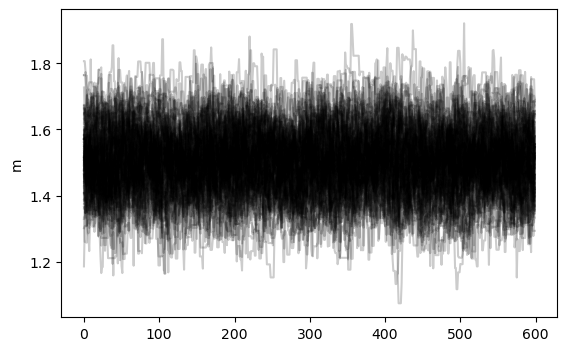

In [ ]:
model.burn_percentage=25
model.run_mcmc(800,repeat=1)
model.plot_chains()

In [ ]:
model.initial_pos.shape

(100, 1)

In [ ]:
raise ValueError

ValueError: 

In [ ]:
self=model
θ=self.initial_pos[0,:]
θ,self._lnprior(θ,self.slices,self.extra_params),self._lnlikelihood(θ,self.data,self.slices,self.extra_params)

(array([-7.45738535]), -2.995732273553991, -5583.259660427744)

(array([10., 17., 17.,  8.,  8.,  7.,  8.,  9.,  7.,  9.]),
 array([-9.97585871, -7.9933293 , -6.0107999 , -4.02827049, -2.04574108,
        -0.06321168,  1.91931773,  3.90184714,  5.88437654,  7.86690595,
         9.84943536]),
 <BarContainer object of 10 artists>)

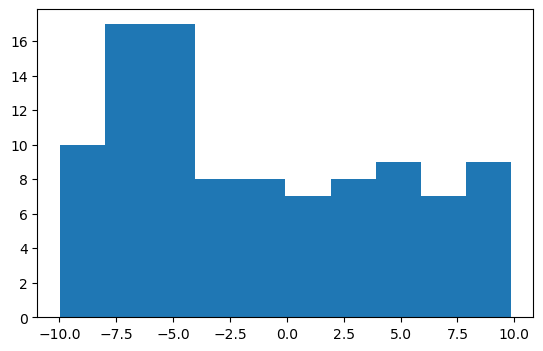

In [ ]:
hist(self.initial_pos)

In [ ]:
xy1="""
X	Y
10	8.04
8	6.95
13	7.58
9	8.81
11	8.33
14	9.96
6	7.24
4	4.26
12	10.84
7	4.82
5	5.68
"""
xy=xy1
x,y=array([_.split() for _ in xy.strip().split('\n')[1:]],dtype=float).T
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("y ~ Normal(m*x+b,1)")
model.initialize()


In [ ]:
# model=StatsModel()
# model.add_data(x=x,y=y)
# model.add("m ~ Normal(0,10)")
# model.add("b ~ Normal(0,10)")
# model.add("σ ~ Jeffreys()")
# model.add("res ~ Normal(m*x+b-y,σ,sum=True)")
# model.initialize()
# model

In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]


    _value=0

    _value+=Normal(m*x+b,1)(y)

    return _value.sum()



Sampling Prior...
Done.
0.31 s
Running MCMC 1/3...
Done.
1.34 s
Samples
Running MCMC 2/3...
Done.
1.37 s
Samples
Running MCMC 3/3...
Done.
1.38 s
Samples
figsize [6.4, 8.0]


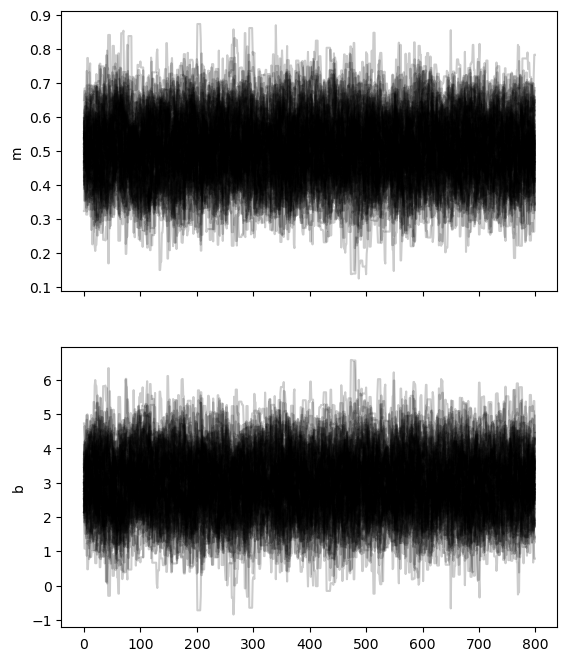

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
self=model
args=[key for key in self.parameters if len(self.parameters[key])==1]
result={}
for key in args:
    s=self.slices.__getattribute__(key)
    sub_sample=self.samples[:,s]
    result[key]=np.percentile(sub_sample,[16,50,84],axis=0)

In [ ]:
result

{'m': array([[0.41247514],
        [0.50496333],
        [0.59793247]]),
 'b': array([[2.07250033],
        [2.95120593],
        [3.83999882]])}

[('m', 0, array([0.32079466, 0.50496333, 0.69148038])),
 ('b', 0, array([1.20957748, 2.95120593, 4.72782036]))]

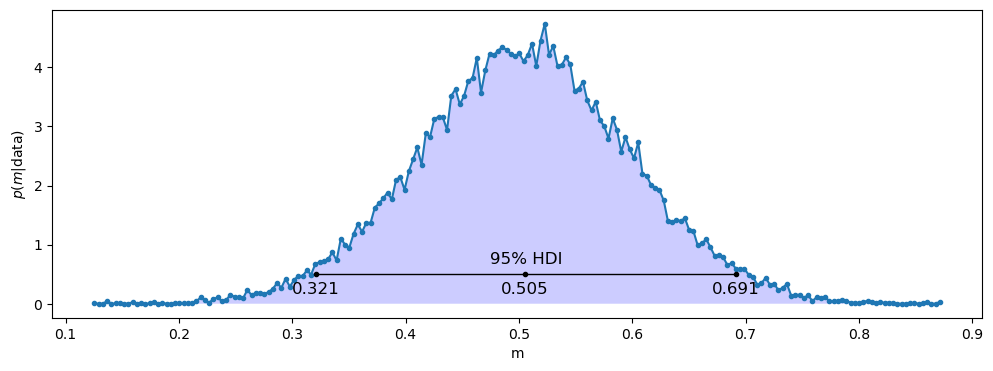

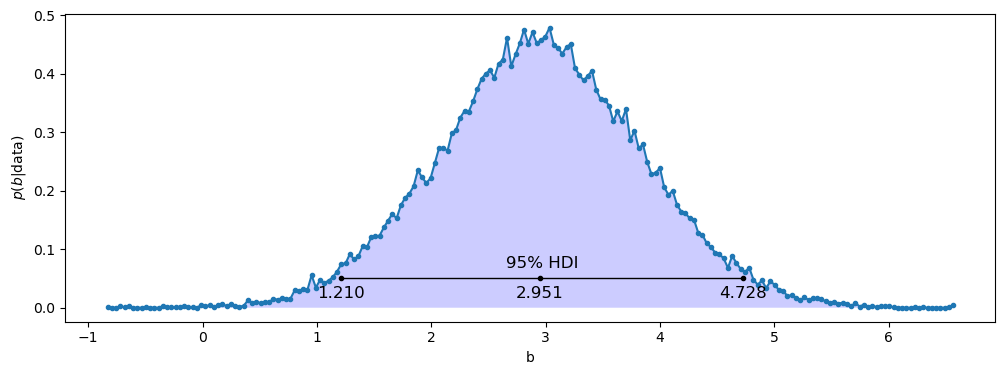

In [ ]:
model.plot_distributions()

In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]


    _value=0

    _value+=Normal(m*x+b,1)(y)

    return _value.sum()



In [ ]:
raise ValueError

In [ ]:
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("σ ~ Jeffreys()")
model.add("y ~ Normal(m*x+b,σ)")  
model.initialize()


In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)
    _value+=Jeffreys()(σ)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)
    σ=_pos[:,slices.σ]=init_Jeffreys()(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]


    _value=0

    _value+=Normal(m*x+b,σ)(y)

    return _value.sum()



Sampling Prior...
Done.
0.36 s
Running MCMC 1/3...
Done.
1.63 s
Samples
Running MCMC 2/3...
Done.
1.66 s
Samples
Running MCMC 3/3...
Done.
1.65 s
Samples
figsize [6.4, 12.0]


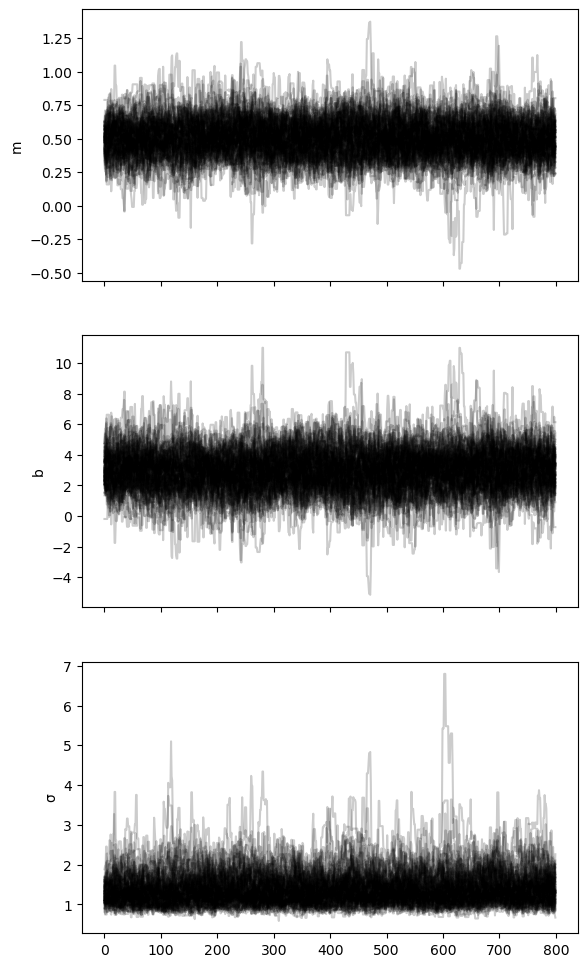

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
model.P("m>0")

0.9987333333333334

In [ ]:
model.plot_distributions("2*m")

AssertionError: 

In [ ]:
self=model
θ=self.initial_pos[:20,:]
θ

array([[  4.74731047, -18.58198965,   0.1229024 ],
       [-29.06797148,  10.06684216,   1.67555998],
       [  1.22892426,  -1.80122321,   0.06536479],
       [ -9.02438589,  -6.30607455,   0.78546447],
       [ -2.43153151,   8.58297723,   1.2994032 ],
       [  0.67085456,  -3.61390059,   1.21867504],
       [ 12.39047784,   9.01428504,   0.65332576],
       [  2.50896909,  -4.10298808,   1.69405818],
       [  2.1449953 ,   0.34752667,   0.17492012],
       [-11.09787371,   6.86672885,   0.23749636],
       [ -2.90181005,  22.39900296,   1.35805372],
       [  5.52259248, -15.24108784,   0.3274527 ],
       [ -0.30621492,   6.83007445,   1.57983394],
       [ -9.7701718 ,   4.9757008 ,   0.8757528 ],
       [ -7.29345994,   4.14509252,   0.62734185],
       [-20.88035455, -15.91359803,   1.9433987 ],
       [-12.69684025,  -2.50913093,   0.70889489],
       [ 15.35175396,  14.43486006,   0.2098608 ],
       [  9.10658733,  -5.08206908,   1.55820812],
       [  6.51902932,  -4.84810

In [ ]:
arr=self.initial_pos[:20,:]-array([.1,.1,.1])
arr

array([[ 4.64731047e+00, -1.86819896e+01,  2.29023961e-02],
       [-2.91679715e+01,  9.96684216e+00,  1.57555998e+00],
       [ 1.12892426e+00, -1.90122321e+00, -3.46352090e-02],
       [-9.12438589e+00, -6.40607455e+00,  6.85464467e-01],
       [-2.53153151e+00,  8.48297723e+00,  1.19940320e+00],
       [ 5.70854564e-01, -3.71390059e+00,  1.11867504e+00],
       [ 1.22904778e+01,  8.91428504e+00,  5.53325761e-01],
       [ 2.40896909e+00, -4.20298808e+00,  1.59405818e+00],
       [ 2.04499530e+00,  2.47526669e-01,  7.49201177e-02],
       [-1.11978737e+01,  6.76672885e+00,  1.37496355e-01],
       [-3.00181005e+00,  2.22990030e+01,  1.25805372e+00],
       [ 5.42259248e+00, -1.53410878e+01,  2.27452698e-01],
       [-4.06214919e-01,  6.73007445e+00,  1.47983394e+00],
       [-9.87017180e+00,  4.87570080e+00,  7.75752800e-01],
       [-7.39345994e+00,  4.04509252e+00,  5.27341851e-01],
       [-2.09803546e+01, -1.60135980e+01,  1.84339870e+00],
       [-1.27968403e+01, -2.60913093e+00

In [ ]:
for θ in array([[-14.826862,  -2.981727,   1.045552],
       [  8.431632,   0.585361,   0.772754],
       [ 16.236694, -15.309931,   0.598796],
       [  9.68161 , -12.441471,   0.277232],
       [ -2.876358,  13.452778,   1.142028],
       [  0.960544,  -6.129887,   0.608603],
       [-10.705965,  14.828011,   0.864605],
       [ -4.720638,   4.334791,   0.429033],
       [ 12.182724,  -4.694871,   1.443504],
       [  7.418043,  10.181135,   1.842945],
       [ -3.068734,  -0.922276,   1.860529],
       [-14.820863,  -4.646646,   1.393483],
       [  4.580451,   4.437066,   0.725135],
       [ 23.5882  ,  -1.953356,  -0.064157],
       [ -4.523048,  -3.039452,   1.490533],
       [ -4.36002 ,  -8.094485,   1.831194],
       [ -8.339802,  -8.504516,   1.81273 ],
       [-20.571723,  -6.085963,   1.62975 ],
       [  0.097142,  15.175296,   1.293157],
       [  2.090642,  -0.407717,   0.347838]]):

    print(self._lnprior(array(θ),self.slices,self.extra_params),self._lnlikelihood(θ,self.data,self.slices,self.extra_params))
    

[-7.63122489] -116053.35664147575
[-6.54242806] -49624.68863033558
[-8.42033404] -271284.712488917
[-6.40276554] -383493.4307319233
[-7.52210624] -2173.5412572116097
[-6.13894894] -423.83829051942206
[-7.97000271] -67570.04446483194
[-5.80219999] -70455.07262344194
[-7.66242363] -28685.642289709896
[-7.84782645] -8602.747273308743
[-7.11524672] -2285.25896388812
[-7.98110012] -66658.30325099513
[-6.32499025] -16992.79131949287
-inf -62101305.19666264
[-6.99066218] -7143.979791298033
[-7.47066777] -5338.190076929831
[-7.7472767] -15206.598338294943
[-9.23264755] -90994.54274940892
[-7.85162899] -262.74851298115357
[-5.40971391] -6613.31660112495


In [ ]:
from nbdev.quarto import nbdev_docs
nbdev_docs(skip_file_glob='*99*.ipynb')

[1/7] 00_core.ipynb
[2/7] 99_debug_mcmc.ipynb
[3/7] 01_mcmc.ipynb
[4/7] 02_tutorial_mcmc.ipynb
[5/7] 02a_tutorial_BEST.ipynb
[6/7] 99_debug_BEST.ipynb
[7/7] index.ipynb

Output created: _docs/index.html



In [ ]:
nbdev_docs??

Signature:
nbdev_docs(
    path: 'str' = None,
    n_workers: 'int' = 16,
    *,
    file_glob: 'str' = None,
    file_re: 'str' = '\\.(?:ipynb|qmd|html)$',
    symlinks: bool = False,
    folder_re: str = None,
    skip_file_glob: str = None,
    skip_file_re: str = '^[_.]',
    skip_folder_re: str = '^[_.]',
)
Source:   
@call_parse
@delegates(_nbglob_docs)
def nbdev_docs(
    path:str=None, # Path to notebooks
    n_workers:int=defaults.cpus,  # Number of workers
    **kwargs):
    "Create Quarto docs and README.md"
    cache,cfg,path = _pre_docs(path, n_workers=n_workers, **kwargs)
    nbdev_readme.__wrapped__(path=path, chk_time=True)
    _sprun(f'cd "{cache}" && quarto render --no-cache')
    shutil.rmtree(cfg.doc_path, ignore_errors=True)
    move(cache/cfg.doc_path.name, cfg.config_path)
File:      /opt/anaconda3/envs/work/lib/python3.11/site-packages/nbdev/quarto.py
Type:      function